<a href="https://colab.research.google.com/github/EmirhanKisa/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [20]:
df = pd.read_csv("/content/cardekho.csv")

In [21]:
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [22]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [23]:
# 1. 'fuel' (string) sütununu sayısala çevir (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['fuel'], drop_first=False)

# 2. Boş (NaN) değerleri atalım
df_encoded.dropna(inplace=True)

# 3. One-hot sütunlarını otomatik seçip 1/0 yap
one_hot_cols = [col for col in df_encoded.columns if col.startswith('fuel_')]
df_encoded[one_hot_cols] = df_encoded[one_hot_cols].astype(int)

print(f"\nTemizleme ve Encoding tamamlandı. Kalan satır sayısı: {len(df_encoded)}")
print("\n--- Hazırlanmış Verinin İlk 5 Satırı ---")
print(df_encoded.head())



Temizleme ve Encoding tamamlandı. Kalan satır sayısı: 7907

--- Hazırlanmış Verinin İlk 5 Satırı ---
                           name  year  selling_price  km_driven seller_type  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Individual   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Individual   
2      Honda City 2017-2020 EXi  2006         158000     140000  Individual   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Individual   
4        Maruti Swift VXI BSIII  2007         130000     120000  Individual   

  transmission         owner  mileage(km/ltr/kg)  engine max_power  seats  \
0       Manual   First Owner               23.40  1248.0        74    5.0   
1       Manual  Second Owner               21.14  1498.0    103.52    5.0   
2       Manual   Third Owner               17.70  1497.0        78    5.0   
3       Manual   First Owner               23.00  1396.0        90    5.0   
4       Manual   First Owner          

In [24]:
X = df_encoded[['year', 'km_driven', 'engine', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'fuel_CNG']].copy()

from sklearn.preprocessing import LabelEncoder

le_engine = LabelEncoder()
X.loc[:, 'engine'] = le_engine.fit_transform(X['engine'])

Y = np.log1p(df_encoded['selling_price'])


Kullanıcağım bağımsız değişkenlerim 'year'  'km_driven'  'engine'  'fuel'

Burdaki tek objemiz fuel onuda int çevirmem gerekiyor


In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def evaluate(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Log -> gerçek fiyata dönüş
    y_pred_real = np.exp(y_pred)
    y_test_real = np.exp(y_test)

    r2 = r2_score(y_test_real, y_pred_real)
    mae = mean_absolute_error(y_test_real, y_pred_real)
    mse = mean_squared_error(y_test_real, y_pred_real)
    rmse = np.sqrt(mse)
    yanilma = mae / np.mean(y_test_real)

    return {
        "model": name,
        "r2": r2,
        "mae": mae,
        "rmse": rmse,
        "yanilma": yanilma
    }

# Modeller
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

# Değerlendir
rf_res = evaluate(rf, X_train, X_test, y_train, y_test, "Random Forest")
lr_res = evaluate(lr, X_train, X_test, y_train, y_test, "Linear Regression")

# Sonuçları yazdır
print("\n=== KARŞILAŞTIRMA ===")
print(f"RandomForest R²: {rf_res['r2']:.3f}")
print(f"LinearReg   R²: {lr_res['r2']:.3f}")

print(f"\nRandomForest MAE: {rf_res['mae']:.2f} TL")
print(f"LinearReg   MAE: {lr_res['mae']:.2f} TL")

print(f"\nRandomForest RMSE: {rf_res['rmse']:.2f} TL")
print(f"LinearReg   RMSE: {lr_res['rmse']:.2f} TL")

print(f"\nRandomForest MAE Yanılma: {rf_res['yanilma']:.3f}")
print(f"LinearReg   MAE Yanılma: {lr_res['yanilma']:.3f}")


=== KARŞILAŞTIRMA ===
RandomForest R²: 0.948
LinearReg   R²: 0.491

RandomForest MAE: 91102.35 TL
LinearReg   MAE: 246943.80 TL

RandomForest RMSE: 196917.83 TL
LinearReg   RMSE: 616736.02 TL

RandomForest MAE Yanılma: 0.138
LinearReg   MAE Yanılma: 0.375


# **R² Değerleri**

RandomForest R²: 0.948
Model verideki varyansın %94.8’ini açıklıyor. Bu, araba fiyatı gibi yüksek değişkenlik gösteren bir problem için oldukça güçlü.

Linear Regression R²: Verinin yalnızca yarısını açıklıyor. Bu, çok düşük bir seviye.

# **MAE (Ortalama Mutlak Hata)**

RandomForest MAE: 91.102 TL Araba fiyatı datasında 90 bin TL hata oldukça kabul edilebilir.

LinearReg MAE: 246.943 TL Lineer model ise bu seviyede kullanılabilir değil.
# **RMSE (Kök Ort. Kare Hata)**
RandomForest RMSE: 196.917 TL Araba fiyatları için kabul edilebilinir.

LinearReg RMSE: 616.736 TL Lineer model ise uçurum.
# MAE Yanılma Oranı
%13 hata araba piyasası tahmin için oldukça güçlü sayılır.

%37 hata ise kullanılabilir değil.



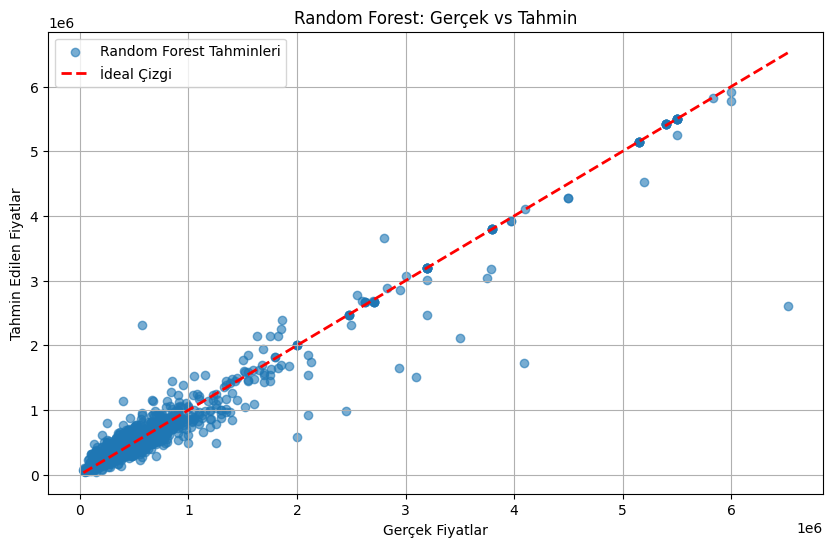

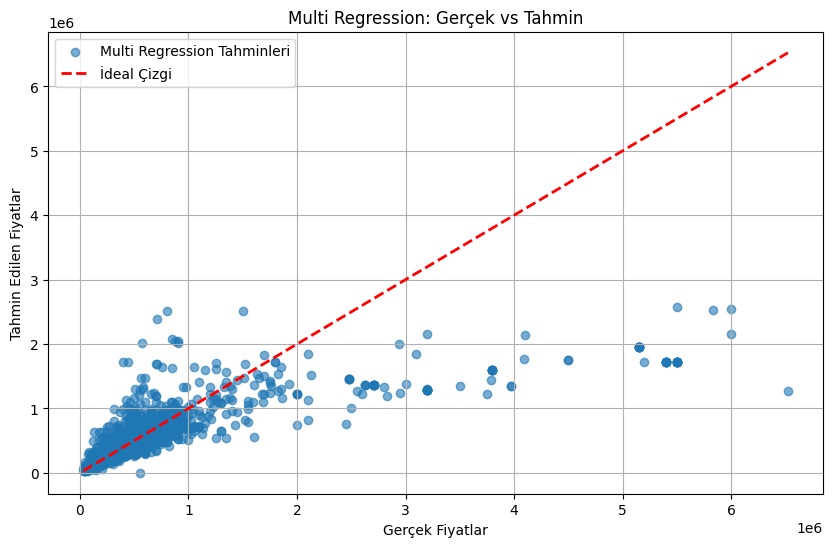

In [26]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# Modeller
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Tahminler (log → gerçek fiyat)
rf_pred = np.exp(rf.predict(X_test))
lr_pred = np.exp(lr.predict(X_test))
y_test_real = np.exp(y_test)

# -------------------------------
# 1) Random Forest Grafiği
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, rf_pred, alpha=0.6, label="Random Forest Tahminleri")
plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()],
    'r--', lw=2, label='İdeal Çizgi'
)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Random Forest: Gerçek vs Tahmin")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 2) Multi Regression Grafiği
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, lr_pred, alpha=0.6, label="Multi Regression Tahminleri")
plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()],
    'r--', lw=2, label='İdeal Çizgi'
)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Multi Regression: Gerçek vs Tahmin")
plt.legend()
plt.grid(True)
plt.show()

| Özellik                      | Random Forest | Linear Regression |
| ---------------------------- | ------------- | ----------------- |
| Kırmızı çizgiye yakınlık     | Yüksek        | Düşük             |
| Yüksek fiyatlarda performans | İyi           | Kötü              |
| Dağılım sıkılığı             | Sıkı          | Geniş             |
| Non-lineer ilişkiler         | Yakalar       | Yakalamaz         |
| Genel model kalitesi         | Çok iyi       | Zayıf             |
# Kendi yorumum
Başta araba fiyatını tahmin etmek için Multi Linear Regression (çoklu lineer regresyon) modeli geliştirmeyi planladım, bu yüzden 4 tane bağımsız değişken kullandım. Ancak grafikleri ve performans metriklerini incelediğimde, araba fiyatları ile bağımsız değişkenler arasındaki ilişki lineer olmayıp, segmentlere ayrılmış ve karmaşık bir yapı gösterdi. Multi Linear Regression bu tür non-lineer ilişkileri doğru şekilde modelleyemiyor. Random Forest ise non-lineer ve segmentli ilişkileri öğrenebilen bir algoritma olduğu için bu tip tahmin problemleri için daha uygun olduğunu gördüm.


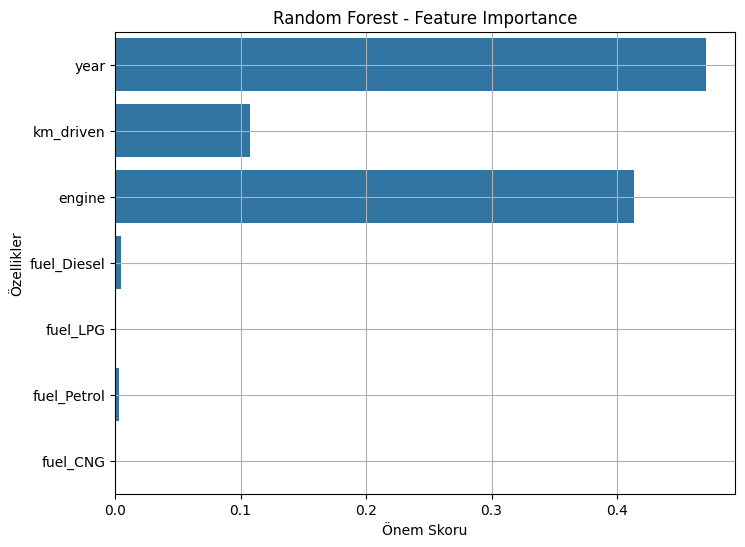

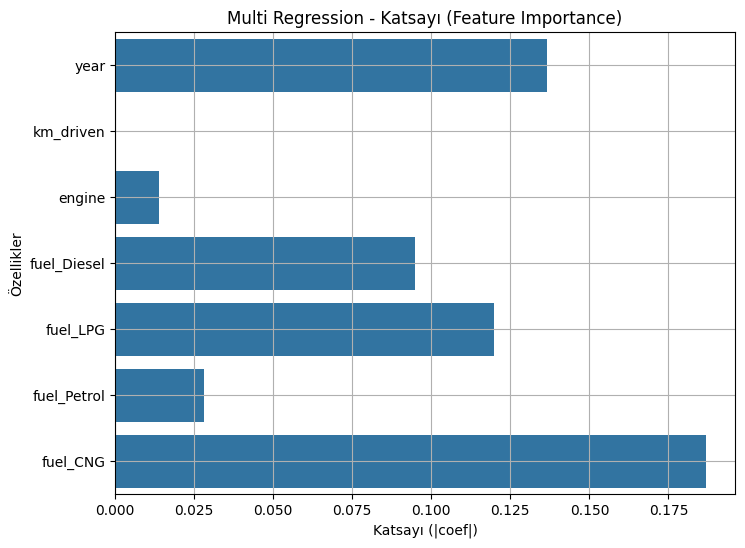

In [27]:
# Modeller
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# ============================
# 1) Random Forest Feature Importance
# ============================
plt.figure(figsize=(8, 6))
importance_rf = rf.feature_importances_
sns.barplot(x=importance_rf, y=X.columns)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.grid(True)
plt.show()

# ============================
# 2) Linear Regression Katsayıları (Feature Importance gibi)
# ============================
plt.figure(figsize=(8, 6))
importance_lr = np.abs(lr.coef_)  # önem olarak mutlak değer
sns.barplot(x=importance_lr, y=X.columns)
plt.title("Multi Regression - Katsayı (Feature Importance)")
plt.xlabel("Katsayı (|coef|)")
plt.ylabel("Özellikler")
plt.grid(True)
plt.show()

# Yorumum
Random Forest: Non-lineer ilişkileri ve segmentleri yakalayabiliyor. Bu nedenle engine ve year gibi fiyatı güçlü etkileyen continuous değişkenler öne çıkıyor.

Multi Linear Regression: Sadece lineer ilişkiyi yakalayabiliyor. Fuel tipleri gibi categorical değişkenler lineer olarak katsayı alıyor ve önemleri öne çıkıyor, ama non-lineer etkiler gözükmüyor.

Özet: Feature importance grafikleri, hangi modelin hangi tip değişkenleri ve ilişkileri daha iyi yakaladığını gösteriyor. Random Forest, gerçek dünya karmaşık fiyat ilişkilerini daha iyi modelliyor. Multi Linear Regression daha basit lineer etkileri ön plana çıkarıyor.